In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import accuracy_score

2024-05-03 19:26:48.373737: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-03 19:26:48.374069: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-03 19:26:48.377113: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-03 19:26:48.415184: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-03 19:26:49.166814: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
value_list = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train = train.drop('label',axis=1)/255
y_train = train['label']
X_test = test.drop('label',axis=1)/255
y_test = test['label']

In [6]:
X_train.shape

(60000, 784)

In [7]:
X_train = np.reshape(X_train,(X_train.shape[0],28,28))
X_test = np.reshape(X_test,(X_test.shape[0],28,28))

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_test.shape

(10000, 28, 28)

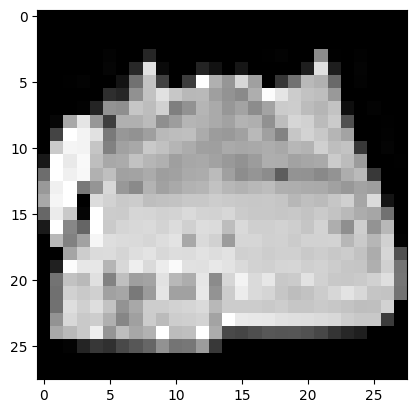

In [10]:
plt.imshow(X_train[100],'gray')

In [11]:
y_train[100]

8

In [25]:
nn = keras.models.Sequential([
    keras.layers.Input(shape = (28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

In [26]:
nn.compile(optimizer = 'adam', metrics = ['accuracy'], loss='sparse_categorical_crossentropy')

In [27]:
history = nn.fit(X_train,y_train, epochs = 10, validation_split = 0.3)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7619 - loss: 0.6813 - val_accuracy: 0.8379 - val_loss: 0.4469
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8556 - loss: 0.3958 - val_accuracy: 0.8523 - val_loss: 0.4110
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8692 - loss: 0.3529 - val_accuracy: 0.8676 - val_loss: 0.3659
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8786 - loss: 0.3250 - val_accuracy: 0.8763 - val_loss: 0.3450
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8880 - loss: 0.3027 - val_accuracy: 0.8673 - val_loss: 0.3607
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8913 - loss: 0.2897 - val_accuracy: 0.8726 - val_loss: 0.3530
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8952 - loss: 0.2767 - val_accuracy: 0.8772 - val_loss: 0.3495
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9003 - loss: 0.2672 - 

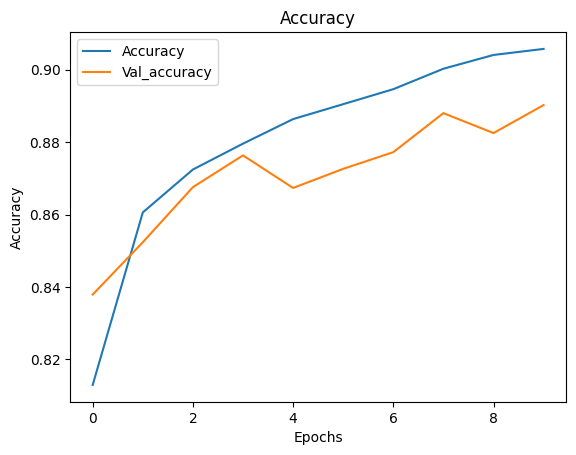

In [47]:
plt.plot(history.history['accuracy'],label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Accuracy.png',dpi=144,bbox_inches='tight')
plt.show()

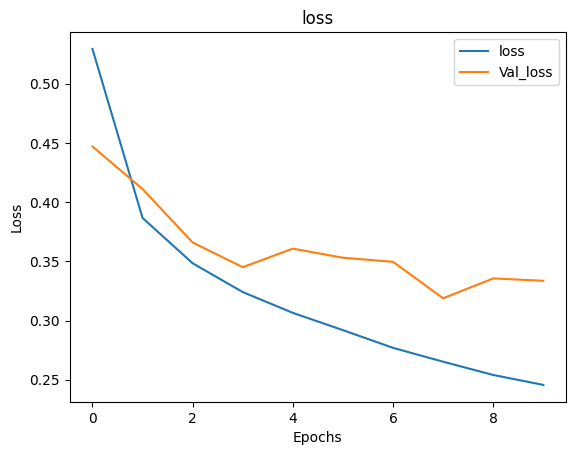

In [48]:
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_loss'], label = 'Val_loss')
plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Loss.png',dpi=144,bbox_inches='tight')
plt.show()

In [30]:
pred = np.argmax(nn.predict(X_test),axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [31]:
accuracy_score(y_test,pred)

0.8869

In [32]:
def predict(n):
    return value_list[int(np.argmax(nn.predict(n.reshape((1,28,28))),axis=1))]

In [43]:
x = 11

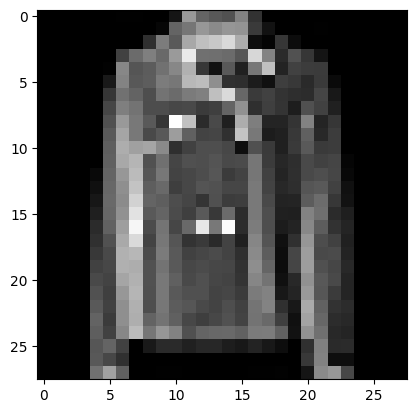

In [44]:
plt.imshow(X_test[x],'gray') 

In [45]:
predict(X_test[x])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/run/user/1000/app/org.jupyter.JupyterLab/ipykernel_3594/2280259376.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return value_list[int(np.argmax(nn.predict(n.reshape((1,28,28))),axis=1))]


'Coat'

In [46]:
value_list[y_test[x]]

'Coat'